In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from funciones_EDA import *

In [2]:
df_malaga = pd.read_csv("../data/dataset_viajeros_procesado.csv", encoding= "latin1", sep= ";")
df_malaga.drop(columns="Unnamed: 0", inplace=True)

In [3]:
malaga = df_malaga.groupby(["PAIS_ORIGEN"])["TURISTAS"].sum()

top_malaga = pd.DataFrame(malaga)
top_malaga.reset_index(drop=False, inplace=True)

top_malaga.sort_values("TURISTAS", ascending=False, inplace=True)

top_malaga  # me voy a quedar con los 4 primeros en cabeza, que casualmente coinciden con la moda que obtuvimos

,PAIS_ORIGEN,TURISTAS
6,Reino Unido,1472554.0
4,Irlanda,394772.0
5,Países Bajos,369142.0
0,Alemania,341545.0
3,Francia,306942.0
7,Suecia,172368.0
1,Bélgica,102341.0
2,Dinamarca,48658.0


In [4]:
top_malaga_viz = top_malaga[0:4]

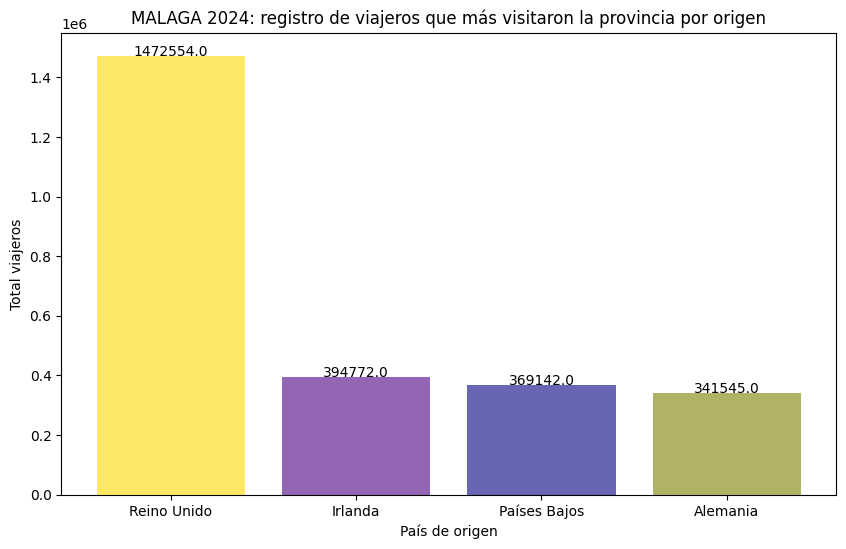

In [5]:
fig, ax = plt.subplots(figsize=(10,6)) 

categorias = top_malaga_viz.PAIS_ORIGEN.value_counts().index.to_list()        # Pasamos a una lista la posición de aparición de frecuencias asociadas a los países de origen
frecuencia = top_malaga_viz["TURISTAS"].to_list()                             # Lista de valores absolutos de turistas

ax.bar(categorias, frecuencia ,color = ["gold","indigo","navy","olive", "magenta"], alpha= 0.6)
ax.set_ylim(0,1550000)
ax.set_title("MALAGA 2024: registro de viajeros que más visitaron la provincia por origen")
ax.set_xlabel("País de origen")
ax.set_ylabel("Total viajeros")  

for i in range (4):
    ax.text(categorias[i],frecuencia[i],f"{frecuencia[i]}", ha = "center", fontsize= "medium")

In [6]:
fig.savefig("../img/top_turistas_por_origen")

In [7]:
malaga = df_malaga.groupby(["PAIS_ORIGEN"])["ESTANCIA_MEDIA"].mean()

top_malaga = pd.DataFrame(malaga)
top_malaga.reset_index(drop=False, inplace=True)

top_malaga.sort_values("ESTANCIA_MEDIA", ascending=False, inplace=True)

top_malaga  # me voy a quedar con los 6 primeros en cabeza, en vez de los 4 primeros, debido a que los resultados son muy parecidos

,PAIS_ORIGEN,ESTANCIA_MEDIA
0,Alemania,8.185714
2,Dinamarca,8.000000
4,Irlanda,7.528571
7,Suecia,7.360000
1,Bélgica,7.350000
3,Francia,7.200000
5,Países Bajos,6.628571
6,Reino Unido,6.364286


In [8]:
top_malaga_viz = top_malaga[0:6]

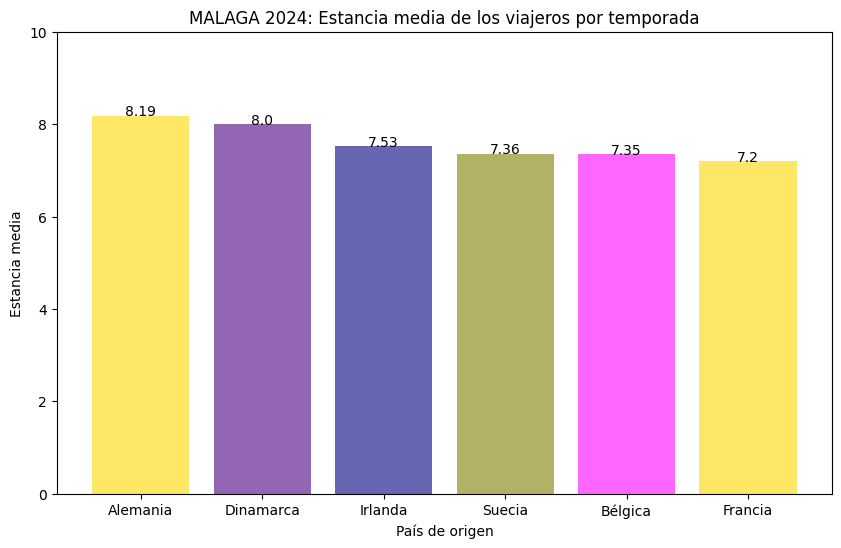

In [9]:
fig, ax = plt.subplots(figsize=(10,6)) 

categorias = top_malaga_viz.PAIS_ORIGEN.value_counts().index.to_list()        
frecuencia = top_malaga_viz["ESTANCIA_MEDIA"].to_list()                            
ax.bar(categorias, frecuencia ,color = ["gold","indigo","navy","olive", "magenta"], alpha= 0.6)
ax.set_ylim(0,10)
ax.set_title("MALAGA 2024: Estancia media de los viajeros por temporada")
ax.set_xlabel("País de origen")
ax.set_ylabel("Estancia media")  

for i in range (6):
    ax.text(categorias[i],frecuencia[i],f"{round(frecuencia[i],2)}", ha = "center", fontsize= "medium")

In [10]:
fig.savefig("../img/estancia_media_por_pais")